# Monte Carlo Analysis in Python

Demonstration of using pandas to analyze Monte Carlo output from MCSim

This notebook covers the following:

* pandas dataframes
* quantiles

In [1]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [27]:
fpath = '/home/qcpt/PBPK-workshop/Day2_AM/Model/four_cmpt_MC.out'
df = pd.read_csv(fpath, sep='\t')
print(df.shape)

(10000, 486)


In [3]:
tfinal = 24
tstep = 0.1
ind_initial = 1
ind_final = int(tfinal/tstep + 1)
blood_df = df.ix[:, 'CBL_mgL_1.{0}'.format(ind_initial):'CBL_mgL_1.{0}'.format(ind_final)]
print(blood_df.shape)

(10000, 241)


## Calculate prediction intervals

In [4]:
p_interval= blood_df.quantile(q=[0.025, 0.5, 0.975], axis=0)

## Plot prediction intervals

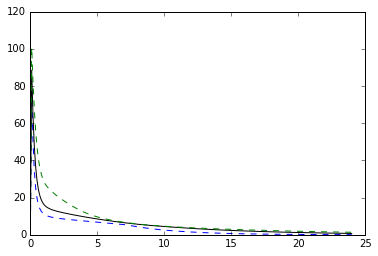

In [6]:
time = np.arange(0, tfinal+tstep, tstep)
plt.plot(time, p_interval.ix[0.025, :], 'b--')
plt.plot(time, p_interval.ix[0.500, :], 'k')
plt.plot(time, p_interval.ix[0.975, :], 'g--')

## Plot multiple compartments

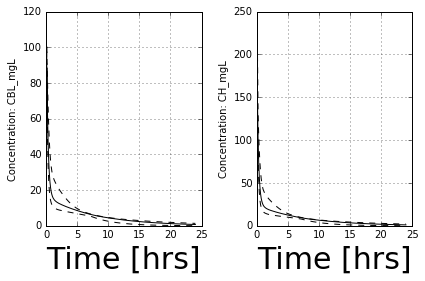

In [12]:
concs = ['CBL_mgL', 'CH_mgL']
fig, ax = plt.subplots(1,2)
for i,c in enumerate(concs):
    conc_df = df.ix[:, '{0}_1.{1}'.format(c, ind_initial) : '{0}_1.{1}'.format(c, ind_final)]
    p_df = conc_df.quantile([0.025, 0.5, 0.975], axis=0)
    ax[i].plot(time, p_df.ix[0.025, :], 'k--')
    ax[i].plot(time, p_df.ix[0.500, :], 'k')
    ax[i].plot(time, p_df.ix[0.975, :], 'k--')
    
    ax[i].set_xlabel('Time [hrs]', fontsize=30)
    ax[i].set_ylabel('Concentration: {0}'.format(c))
    ax[i].grid()
plt.tight_layout()

In [13]:
print(df.columns[:5])

Index(['Iter', 'QCC', 'VKC', 'VHC', 'CBL_mgL_1.1'], dtype='object')


In [30]:
pearson = df.corr('spearman')
print(pearson.shape)

(486, 486)


In [24]:
print(pearson.columns[:5])

Index(['Iter', 'VKC', 'CLC', 'k1', 'CBL_mgL_1.1'], dtype='object')


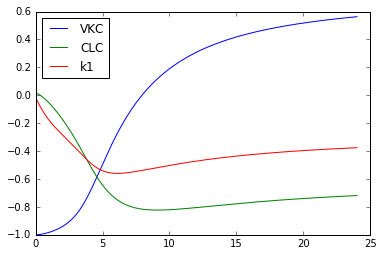

In [31]:
plt.plot(time, pearson.ix['VKC','CK_mgL_1.1':'CK_mgL_1.241'], label='VKC')
plt.plot(time, pearson.ix['CLC','CK_mgL_1.1':'CK_mgL_1.241'], label='CLC')
plt.plot(time, pearson.ix['k1','CK_mgL_1.1':'CK_mgL_1.241'], label='k1')
plt.legend(loc='best')